In [1]:
import pandas as pd
import re
import numpy as np
import nltk
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt', quiet=True)
np.random.seed(0)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\byrdw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\byrdw\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
df = pd.read_csv('tweets.csv')
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
8716,Ipad everywhere. #SXSW {link},iPad,Positive emotion
8717,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
8718,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
8719,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [3]:
print(df.head())

                                          tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2                            iPad   
3              iPad or iPhone App   
4                          Google   

  is_there_an_emotion_directed_at_a_brand_or_product  
0                                   Negative emotion  
1                                   Positive emotion  
2                                   Positive emotion  
3                                   Negative emotion  
4                                   Positive emotion  


In [4]:
tweet = 'Foursquare ups the game, #ipad  just in time for #SXSW http://j.mp/grN7pK) - Still prefer @Gowalla by far, best looking Android app to date.'

In [5]:
tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)

In [6]:
tweet

'Foursquare ups the game, #ipad  just in time for #SXSW  - Still prefer @Gowalla by far, best looking Android app to date.'

In [7]:
#def clean_tweet(tweet):
#    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE) # removing any url's
#    tweet = re.sub(r'\@\w+|\#', '', tweet) # removing hastags and usernames
#    tweet = tweet.lower() # making everything lowercase
#    tweet = re.sub(r'\W', ' ', tweet)
#    tweet = re.sub(r'\s+', ' ', tweet)
    
#    return tweet
#print(clean_tweet(tweet))

def clean_tweet(tweet):
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#', '', tweet)
    tweet = tweet.lower()
    tweet = re.sub(r'\W', ' ', tweet)
    tweet = re.sub(r'\s+', ' ', tweet)
    tweet = tweet.strip()
#    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = tweet.split()
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
#    stemmed_cleaned_words = [stemmer.stem(word) for word in cleaned_words if word not in stop_words]
    return ' '.join(cleaned_words)

In [8]:
tweet

'Foursquare ups the game, #ipad  just in time for #SXSW  - Still prefer @Gowalla by far, best looking Android app to date.'

In [9]:
clean_tweet(tweet)

'foursquare ups game ipad time sxsw still prefer far best looking android app date'

In [10]:
df['tweet_text'] = df['tweet_text'].astype(str)

In [11]:
df['cleaned_tweet'] = df['tweet_text'].apply(clean_tweet)

Tweets are cleaned and we can move on to the next step.  Now let's train the model.  
Encoding values to make a new column, sentiment.  
0=Undefined
1=Negative
2=Indifferent
3=Positve


In [12]:
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['is_there_an_emotion_directed_at_a_brand_or_product'])

In [13]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,cleaned_tweet,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,3g iphone 3 hr tweeting rise_austin dead need ...,1
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,know awesome ipad iphone app likely appreciate...,3
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,wait ipad 2 also sale sxsw,3
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,hope year festival crashy year iphone app sxsw,1
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,great stuff fri sxsw marissa mayer google tim ...,3
...,...,...,...,...,...
8716,Ipad everywhere. #SXSW {link},iPad,Positive emotion,ipad everywhere sxsw link,3
8717,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product,wave buzz rt interrupt regularly scheduled sxs...,2
8718,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product,google zeiger physician never reported potenti...,2
8719,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product,verizon iphone customer complained time fell b...,2


In [14]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,cleaned_tweet,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,3g iphone 3 hr tweeting rise_austin dead need ...,1
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,know awesome ipad iphone app likely appreciate...,3
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,wait ipad 2 also sale sxsw,3
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,hope year festival crashy year iphone app sxsw,1
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,great stuff fri sxsw marissa mayer google tim ...,3


In [15]:
df['tokenized_tweets'] = df['cleaned_tweet'].apply(word_tokenize)
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,cleaned_tweet,sentiment,tokenized_tweets
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,3g iphone 3 hr tweeting rise_austin dead need ...,1,"[3g, iphone, 3, hr, tweeting, rise_austin, dea..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,know awesome ipad iphone app likely appreciate...,3,"[know, awesome, ipad, iphone, app, likely, app..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,wait ipad 2 also sale sxsw,3,"[wait, ipad, 2, also, sale, sxsw]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,hope year festival crashy year iphone app sxsw,1,"[hope, year, festival, crashy, year, iphone, a..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,great stuff fri sxsw marissa mayer google tim ...,3,"[great, stuff, fri, sxsw, marissa, mayer, goog..."


In [16]:
#df = df.drop('tweet_text', axis=1)

In [17]:
def count_vectorize(tokenized_list):
    corpus = {}
    
    for tokenized in tokenized_list:
        for word in tokenized:
            if word in corpus:
                corpus[word] += 1
            else:
                corpus[word] = 1

    return corpus

# Vectorize the tokenized tweets
test_vectorized = count_vectorize(df['tokenized_tweets'])
test_vectorized

{'3g': 29,
 'iphone': 1526,
 '3': 177,
 'hr': 5,
 'tweeting': 28,
 'rise_austin': 2,
 'dead': 16,
 'need': 234,
 'upgrade': 13,
 'plugin': 4,
 'station': 12,
 'sxsw': 9239,
 'know': 197,
 'awesome': 130,
 'ipad': 2438,
 'app': 796,
 'likely': 12,
 'appreciate': 4,
 'design': 136,
 'also': 78,
 'giving': 68,
 'free': 378,
 't': 2,
 'wait': 74,
 '2': 1195,
 'sale': 44,
 'hope': 53,
 'year': 165,
 'festival': 30,
 'crashy': 2,
 'great': 212,
 'stuff': 34,
 'fri': 7,
 'marissa': 186,
 'mayer': 213,
 'google': 2552,
 'tim': 19,
 'reilly': 9,
 'tech': 120,
 'book': 38,
 'conference': 72,
 'amp': 805,
 'matt': 11,
 'mullenweg': 2,
 'wordpress': 8,
 'new': 1066,
 'apps': 212,
 'speechtherapy': 3,
 'communication': 22,
 'showcased': 20,
 'iear': 3,
 'edchat': 39,
 'asd': 3,
 'nan': 1,
 'starting': 32,
 'ctia': 4,
 'around': 130,
 'corner': 14,
 'googleio': 2,
 'hop': 3,
 'skip': 3,
 'jump': 6,
 'good': 165,
 'time': 291,
 'android': 567,
 'fan': 34,
 'beautifully': 2,
 'smart': 61,
 'simple': 1

In [18]:
freq_df = pd.DataFrame(list(test_vectorized.items()), columns=['Word', 'Frequency'])
freq_df

,Word,Frequency
0,3g,29
1,iphone,1526
2,3,177
3,hr,5
4,tweeting,28
...,...,...
8578,complained,1
8579,yorkers,1
8580,ϡ,1
8581,ʋ,1


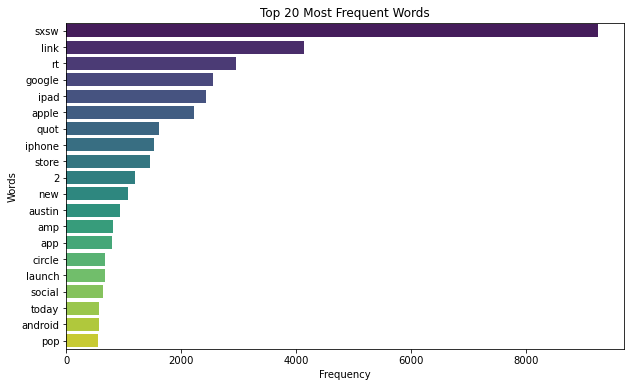

In [19]:
# Convert the word frequency dictionary to a DataFrame
freq_df = pd.DataFrame(list(test_vectorized.items()), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency
freq_df = freq_df.sort_values(by='Frequency', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=freq_df.head(20), palette='viridis')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

In [20]:
freq_df

,Word,Frequency
11,sxsw,9239
211,link,4131
70,rt,2958
35,google,2552
14,ipad,2438
...,...,...
5191,letschangetheworld,1
5195,compels,1
5196,frickin,1
5197,amiss,1


In [21]:
# Calculate the total number of tokens
total_word_count = freq_df['Frequency'].sum()

# Print the total number of tokens
print("Total word count:", total_word_count)

# Extract the top 50 most common words
df_top_50 = freq_df.head(50)

# Print the top 50 words and their normalized frequencies
print(f'{"Word":10} Normalized Frequency')
for word in df_top_50.iterrows():
    normalized_frequency = word[1]['Frequency'] / total_word_count
    print(f'{word[1]["Word"]:10} {normalized_frequency:.6f}')


Total word count: 103052
Word       Normalized Frequency
sxsw       0.089654
link       0.040087
rt         0.028704
google     0.024764
ipad       0.023658
apple      0.021513
quot       0.015730
iphone     0.014808
store      0.014138
2          0.011596
new        0.010344
austin     0.009083
amp        0.007812
app        0.007724
circle     0.006521
launch     0.006521
social     0.006249
today      0.005570
android    0.005502
pop        0.005395
network    0.004483
get        0.004289
line       0.004250
ipad2      0.004211
via        0.003949
party      0.003736
free       0.003668
called     0.003493
mobile     0.003328
sxswi      0.003260
one        0.002989
major      0.002931
like       0.002892
time       0.002824
day        0.002698
check      0.002533
map        0.002513
u          0.002504
temporary  0.002484
w          0.002474
win        0.002436
possibly   0.002368
opening    0.002358
need       0.002271
open       0.002251
go         0.002242
people     0.002203
com

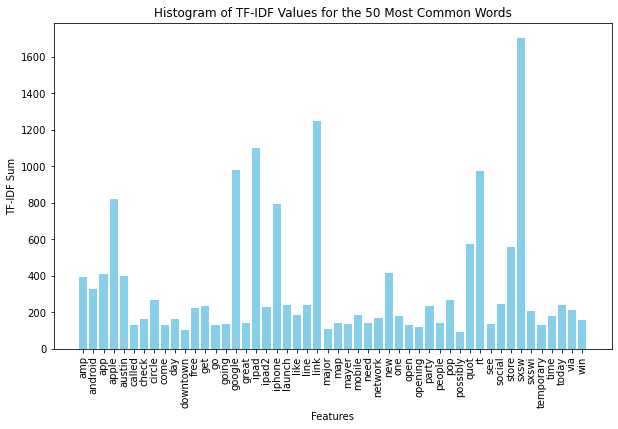

In [22]:
df['cleaned_tweet'] = df['cleaned_tweet'].astype(str)
df['cleaned_text'] = df['cleaned_tweet'].apply(clean_tweet)

text_data = df['cleaned_text'].tolist()

count_vectorizer = CountVectorizer(max_features=50)
X_counts = count_vectorizer.fit_transform(text_data)
common_words = count_vectorizer.get_feature_names()

vectorizer = TfidfVectorizer(vocabulary=common_words)
X = vectorizer.fit_transform(text_data)
tfidf_matrix = X.toarray()

feature_names = vectorizer.get_feature_names()

tfidf_sums = np.sum(tfidf_matrix, axis=0)

plt.figure(figsize=(10, 6))
plt.bar(feature_names, tfidf_sums, color='skyblue')
plt.xlabel('Features')
plt.ylabel('TF-IDF Sum')
plt.title('Histogram of TF-IDF Values for the 50 Most Common Words')
plt.xticks(rotation=90)
plt.show()

In [23]:
def pos_tagging(text):
    words = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(words)
    return ' '.join([f"{word}_{tag}" for word, tag in pos_tags])

df['pos_tagged_text'] = df['cleaned_text'].apply(pos_tagging)

In [24]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,cleaned_tweet,sentiment,tokenized_tweets,cleaned_text,pos_tagged_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,3g iphone 3 hr tweeting rise_austin dead need ...,1,"[3g, iphone, 3, hr, tweeting, rise_austin, dea...",3g iphone 3 hr tweeting rise_austin dead need ...,3g_CD iphone_NN 3_CD hr_NN tweeting_VBG rise_a...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,know awesome ipad iphone app likely appreciate...,3,"[know, awesome, ipad, iphone, app, likely, app...",know awesome ipad iphone app likely appreciate...,know_VB awesome_JJ ipad_NN iphone_NN app_NN li...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,wait ipad 2 also sale sxsw,3,"[wait, ipad, 2, also, sale, sxsw]",wait ipad 2 also sale sxsw,wait_NN ipad_NN 2_CD also_RB sale_NN sxsw_NN
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,hope year festival crashy year iphone app sxsw,1,"[hope, year, festival, crashy, year, iphone, a...",hope year festival crashy year iphone app sxsw,hope_NN year_NN festival_NN crashy_JJ year_NN ...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,great stuff fri sxsw marissa mayer google tim ...,3,"[great, stuff, fri, sxsw, marissa, mayer, goog...",great stuff fri sxsw marissa mayer google tim ...,great_JJ stuff_NN fri_NN sxsw_NN marissa_FW ma...


Tag	Description  
CC	Coordinating conjunction  
CD	Cardinal number  
DT	Determiner  
EX	Existential there  
FW	Foreign word  
IN	Preposition or subordinating conjunction  
JJ	Adjective  
JJR	Adjective, comparative  
JJS	Adjective, superlative  
LS	List item marker  
MD	Modal  
NN	Noun, singular or mass  
NNS	Noun, plural  
NNP	Proper noun, singular  
NNPS	Proper noun, plural  
PDT	Predeterminer  
POS	Possessive ending  
PRP	Personal pronoun  
PRP(dollar symbol)	Possessive pronoun  
RB	Adverb  
RBR	Adverb, comparative  
RBS	Adverb, superlative  
RP	Particle  
SYM	Symbol  
TO	To  
UH	Interjection  
VB	Verb, base form  
VBD	Verb, past tense  
VBG	Verb, gerund or present participle  
VBN	Verb, past participle  
VBP	Verb, non-3rd person singular present  
VBZ	Verb, 3rd person singular present  
WDT	Wh-determiner  
WP	Wh-pronoun  
WP$	Possessive wh-pronoun  
WRB	Wh-adverb  

Sentence: The quick brown fox jumps over the lazy dog.  
POS Tags: DT  JJ    JJ    NN  VBZ   IN   DT  JJ   NN  
           |   |     |    |    |     |    |   |    |  
           The quick brown fox jumps over the lazy dog

In [25]:
X = df['cleaned_tweet']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Let's build a multiclass classification Logitic Regression

In [27]:
model = LogisticRegression(multi_class='ovr')
model.fit(X_train_tfidf, y_train)

LogisticRegression(multi_class='ovr')

In [28]:
y_pred = model.predict(X_test_tfidf)
print("Multiclass CLassifier Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Multiclass CLassifier Accuracy: 0.6773638968481376
                                    precision    recall  f1-score   support

                      I can't tell       0.00      0.00      0.00        40
                  Negative emotion       0.43      0.03      0.06        94
No emotion toward brand or product       0.70      0.89      0.78      1076
                  Positive emotion       0.60      0.41      0.49       535

                          accuracy                           0.68      1745
                         macro avg       0.43      0.33      0.33      1745
                      weighted avg       0.64      0.68      0.64      1745



C:\Users\byrdw\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Let's check if there is a class imbalance problem.

In [29]:
df['sentiment'].value_counts()

2    5156
3    2869
1     545
0     151
Name: sentiment, dtype: int64

In [30]:
#vectorizer_count = CountVectorizer()
#train_data_X = vectorizer.fit_transform(df)
#vocab = vectorizer.get_feature_names()
#print(train_data_X.toarray())

In [31]:
#print(vocab)

In [32]:
model = LogisticRegression(multi_class='ovr', class_weight='balanced')
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)
print("Multiclass CLassifier Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Multiclass CLassifier Accuracy: 0.6108882521489971
                                    precision    recall  f1-score   support

                      I can't tell       0.03      0.03      0.03        40
                  Negative emotion       0.25      0.44      0.32        94
No emotion toward brand or product       0.77      0.66      0.71      1076
                  Positive emotion       0.50      0.59      0.54       535

                          accuracy                           0.61      1745
                         macro avg       0.39      0.43      0.40      1745
                      weighted avg       0.64      0.61      0.62      1745



In [33]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

In [34]:
model = LogisticRegression(multi_class='ovr', class_weight='balanced')
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test_tfidf)
print("Multiclass CLassifier Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Multiclass CLassifier Accuracy: 0.5959885386819485
                                    precision    recall  f1-score   support

                      I can't tell       0.06      0.07      0.06        40
                  Negative emotion       0.22      0.43      0.29        94
No emotion toward brand or product       0.76      0.65      0.70      1076
                  Positive emotion       0.51      0.55      0.53       535

                          accuracy                           0.60      1745
                         macro avg       0.39      0.43      0.40      1745
                      weighted avg       0.63      0.60      0.61      1745



We can see oversampling the minority class negatively impacts the majority class and overall accuracy of our model.

In [35]:
undersample = RandomUnderSampler()
X_train_undersample, y_train_undersample = undersample.fit_resample(X_train_tfidf, y_train)


Undersampling severly impacted our model from an accuracy perspective, but did improve recall on our minority class.

In [36]:
model = LogisticRegression(multi_class='ovr', class_weight='balanced')
model.fit(X_train_undersample, y_train_undersample)
y_pred = model.predict(X_test_tfidf)
print("Multiclass CLassifier Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Multiclass CLassifier Accuracy: 0.38108882521489973
                                    precision    recall  f1-score   support

                      I can't tell       0.03      0.23      0.05        40
                  Negative emotion       0.13      0.44      0.20        94
No emotion toward brand or product       0.71      0.37      0.49      1076
                  Positive emotion       0.40      0.41      0.40       535

                          accuracy                           0.38      1745
                         macro avg       0.32      0.36      0.28      1745
                      weighted avg       0.56      0.38      0.43      1745

